<a href="https://colab.research.google.com/github/Muhliscm/IBM_professional_data_analyst_certification/blob/main/M3ExploratoryDataAnalysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


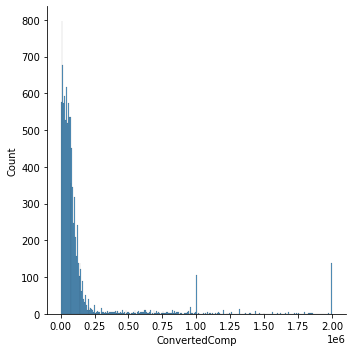

In [5]:
# your code goes here
import seaborn as sns
sns.displot(df["ConvertedComp"])

Plot the histogram for the column `ConvertedComp`.


(array([7.926e+03, 1.733e+03, 1.620e+02, 7.600e+01, 6.500e+01, 5.000e+01,
        6.900e+01, 5.600e+01, 5.000e+01, 4.900e+01, 1.160e+02, 1.500e+01,
        1.600e+01, 1.800e+01, 9.000e+00, 6.000e+00, 1.000e+01, 5.000e+00,
        1.200e+01, 1.390e+02]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000., 1100000.,
        1200000., 1300000., 1400000., 1500000., 1600000., 1700000.,
        1800000., 1900000., 2000000.]),
 <a list of 20 Patch objects>)

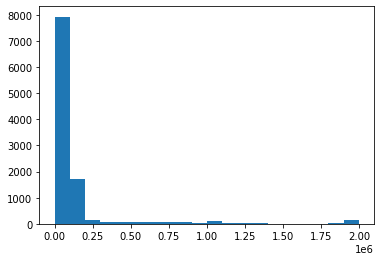

In [6]:
# your code goes here
import matplotlib.pyplot as plt
plt.hist(df["ConvertedComp"], bins = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


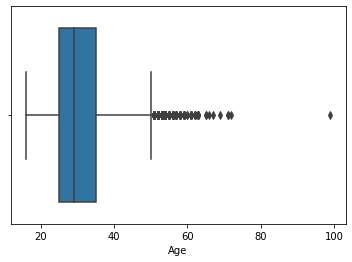

In [49]:
sns.boxplot(df["Age"])

In [51]:
age_q1 = df["Age"].quantile(.25)
age_q1


25.0

2096

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
df["Gender"].tolist().count("Man")

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df["Gender"].tolist().count("Woman")

731

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <a list of 10 Patch objects>)

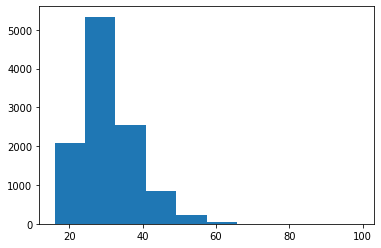

In [18]:
# your code goes here
plt.hist(df["Age"])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


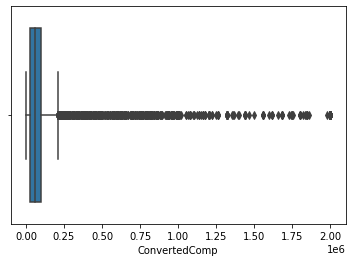

In [19]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# your code goes here
q1 = df["ConvertedComp"].quantile(.25)
q3 = df["ConvertedComp"].quantile(.75)
iqr = q3 - q1
print(iqr)

73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
# your code goes here
df[(df["ConvertedComp"] < lower_bound) | (df["ConvertedComp"] > upper_bound)].ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
df["ConvertedComp"].median()

57745.0

In [29]:
# your code goes here
len(df["ConvertedComp"])

11398

In [31]:
df.shape

(11398, 85)

In [40]:
df_out = df[~((df["ConvertedComp"] < lower_bound ) | (df["ConvertedComp"] > upper_bound))]

In [41]:
df_out.shape

(10519, 85)

In [48]:
df_out["ConvertedComp"].median()

52704.0

In [53]:
df_out["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [46]:
# your code goes here
df_out.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
